In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None) 

In [3]:
df = pd.read_csv("team_data_updated.csv")
df2 = pd.read_csv("elo_ratings_team1.csv")
df3 = pd.read_csv("player_performance_data.csv")
df4 = pd.read_csv("team_stats.csv")

In [147]:
df['win_loss'] = df['win_loss'].map({'W': 1, 'L': 0})
df.fillna(df.mean(), inplace=True)

,Unnamed: 0,game_id,game_played,date,home_away,opponent,team_GF,team_GA,win_loss,extra_time,extra_info,team_shots,team_PIM,team_PPG,team_PPO,team_SHG,extra_info_1,opp_shots,opp_PIM,opp_PPG,opp_PPO,opp_SHG,extra_info_2,team_CF,team_CA,team_CF_percentage,team_FF,team_FA,team_FF_percentage,team_FOW,team_FOL,team_FO_win_percentage,team_oZS_percentage,team_PDO,team,season,b2b,3_in_4,5_in_8
0,0,0,1,2009-10-03,home,San Jose Sharks,1,4,0,NaN,NaN,25,34,1,3.00549,0,NaN,37,46,1,2.984765,1,NaN,29.0,43.0,40.3,23.0,37,38.3,14,13,51.9,47.7,93.1,Anaheim Ducks,20092010,0,0,0
1,1,1,2,2009-10-06,away,Minnesota Wild,3,4,0,OT,NaN,19,19,1,3.00549,0,NaN,32,13,3,2.984765,0,NaN,29.0,47.0,38.2,23.0,33,41.1,18,33,35.3,37.5,107.5,Anaheim Ducks,20092010,0,0,0
2,2,2,3,2009-10-08,away,Boston Bruins,6,1,1,NaN,NaN,30,12,2,3.00549,1,NaN,34,4,0,2.984765,0,NaN,38.0,49.0,43.7,30.0,39,43.5,26,14,65.0,40.0,110.3,Anaheim Ducks,20092010,0,0,0
3,3,3,4,2009-10-10,away,Philadelphia Flyers,3,2,1,SO,NaN,33,16,0,3.00549,0,NaN,35,10,2,2.984765,0,NaN,46.0,48.0,48.9,33.0,34,49.3,21,17,55.3,53.5,107.7,Anaheim Ducks,20092010,0,0,0
4,4,4,5,2009-10-11,away,New York Rangers,0,3,0,NaN,NaN,18,10,0,3.00549,0,NaN,38,8,2,2.984765,1,NaN,34.0,56.0,37.8,23.0,45,33.8,20,20,50.0,37.9,100.0,Anaheim Ducks,20092010,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37971,33911,33911,78,2023-04-05,home,Calgary Flames,1,3,0,NaN,NaN,35,16,1,5.00000,0,NaN,35,14,0,6.000000,0,NaN,47.0,35.0,57.3,38.0,30,55.9,21,25,45.7,46.6,87.0,Winnipeg Jets,20222023,0,0,0
37972,33912,33912,79,2023-04-08,home,Nashville Predators,2,0,1,NaN,NaN,38,2,0,3.00000,0,NaN,28,6,0,1.000000,0,NaN,70.0,35.0,66.7,49.0,28,63.6,24,18,57.1,61.3,106.3,Winnipeg Jets,20222023,0,0,0
37973,33913,33913,80,2023-04-10,home,San Jose Sharks,6,2,1,NaN,NaN,33,8,2,2.00000,0,NaN,21,4,1,4.000000,0,NaN,65.0,30.0,68.4,53.0,22,70.7,24,21,53.3,70.4,105.2,Winnipeg Jets,20222023,0,0,0
37974,33915,33915,81,2023-04-11,away,Minnesota Wild,3,1,1,NaN,NaN,20,24,0,3.00000,0,NaN,34,27,1,5.000000,0,NaN,33.0,48.0,40.7,22.0,31,41.5,20,22,47.6,42.3,118.8,Winnipeg Jets,20222023,1,1,0


In [13]:
df2['winner_binary'] = (df2['winner'] == df2['homename']).astype(int)
df2['home_advantage'] = 1
df2['elo_diff'] = df2['home_elo'] - df2['away_elo']

In [14]:
#Dependant variables
X = df2[['home_advantage', 'elo_diff', 'home_5in8', 'away_5in8', 
         'home_b2b', 'away_b2b', 
         'home_3in4', 'away_3in4']]
#target variable
y = df2['winner_binary']  
X = sm.add_constant(X)

#Fitting the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())


print("Coefficients:")
print(result.params)

print("P-values:")
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.673763
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          winner_binary   No. Observations:                26298
Model:                          Logit   Df Residuals:                    26290
Method:                           MLE   Df Model:                            7
Date:                Fri, 22 Sep 2023   Pseudo R-squ.:                 0.02467
Time:                        09:52:11   Log-Likelihood:                -17719.
converged:                       True   LL-Null:                       -18167.
Covariance Type:            nonrobust   LLR p-value:                3.163e-189
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
home_advantage     0.1085      0.017      6.557      0.000       0.076       0.141
elo_diff         

In [16]:
coefficients_df = pd.DataFrame()

grouped = df2.groupby('season')

#Fitting the model again for the visualisation and grouping by season
for name, group in grouped:
    X = group[['home_advantage', 'elo_diff', 'home_5in8', 'away_5in8',
               'home_b2b', 'away_b2b', 'home_3in4', 'away_3in4']]
    y = group['winner_binary']
    X = sm.add_constant(X)
    
    model = sm.Logit(y, X)
    result = model.fit(disp=0) 
    

    coefficients_df[name] = result.params

coefficients_df = coefficients_df.T

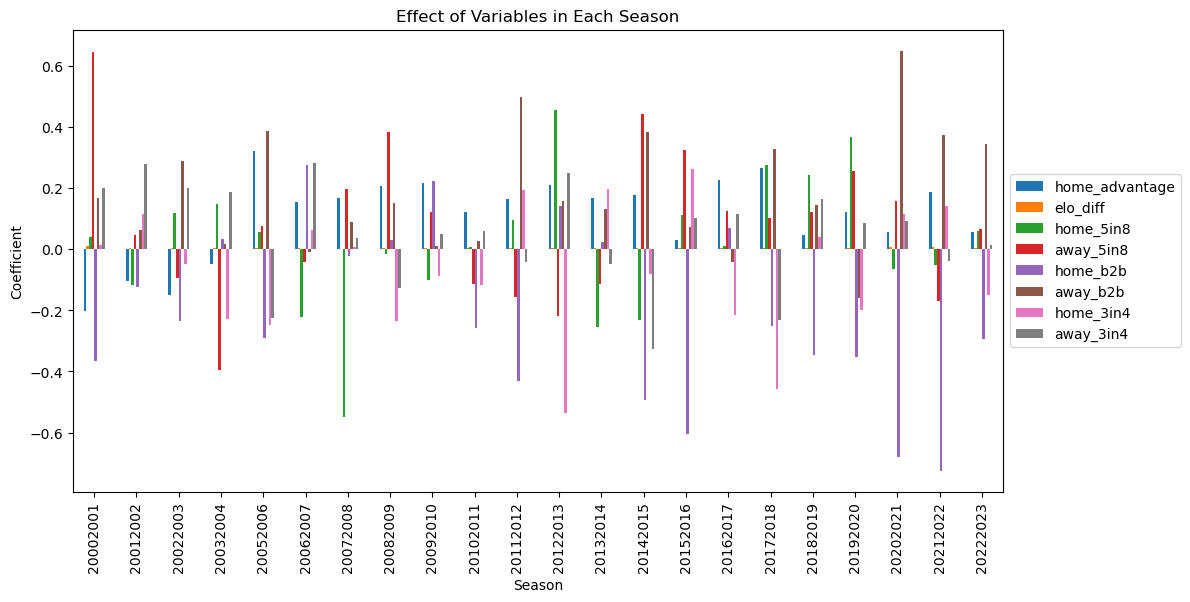

In [17]:
coefficients_df.plot(kind='bar', figsize=(12, 6))
plt.title('Effect of Variables in Each Season')
plt.xlabel('Season')
plt.ylabel('Coefficient')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Plotting ROC Curve

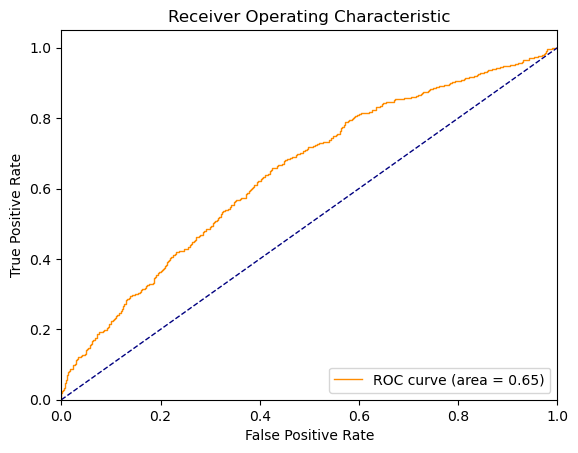

In [19]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y, result.predict(X))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()